In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sys import path
path.insert(1, "/home/maxime/data/utils")
import myfunc as mf
import logomaker as lm
import seaborn as sns
import pywt
lab = mf.loadnp("/home/maxime/data/mnase/labels/IP_data/MNase_bed/multimappers/A/gauss15/chr19.npz")

In [14]:
ctcf = pd.read_csv("/home/maxime/data/sequences/CTCF/LociSets/tfsites/CTCF/bookmarked-CTCF.bed",
                   sep = "\t", header=None)
ctcf = ctcf[ctcf[0]=="chr19"]
pos = ctcf[1].values

<AxesSubplot:>

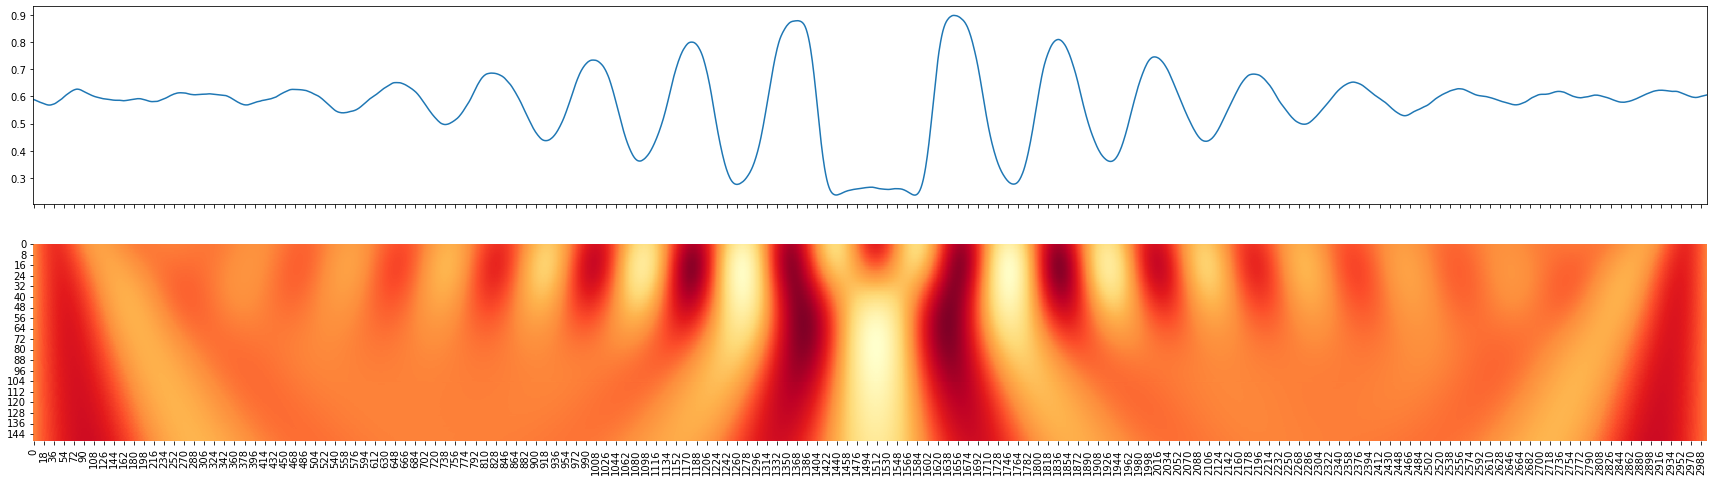

In [95]:
metalab = np.mean(lab[mf.create_ranges(pos-1500, pos+1500)].reshape((-1, 3000)), axis = 0)
coef, freq = pywt.cwt(metalab, np.arange(100, 250), "gaus8", method="fft")
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(30, 8))
axs[0].plot(metalab)
sns.heatmap(coef, ax = axs[1], cbar = False, cmap = "YlOrRd")

<AxesSubplot:>

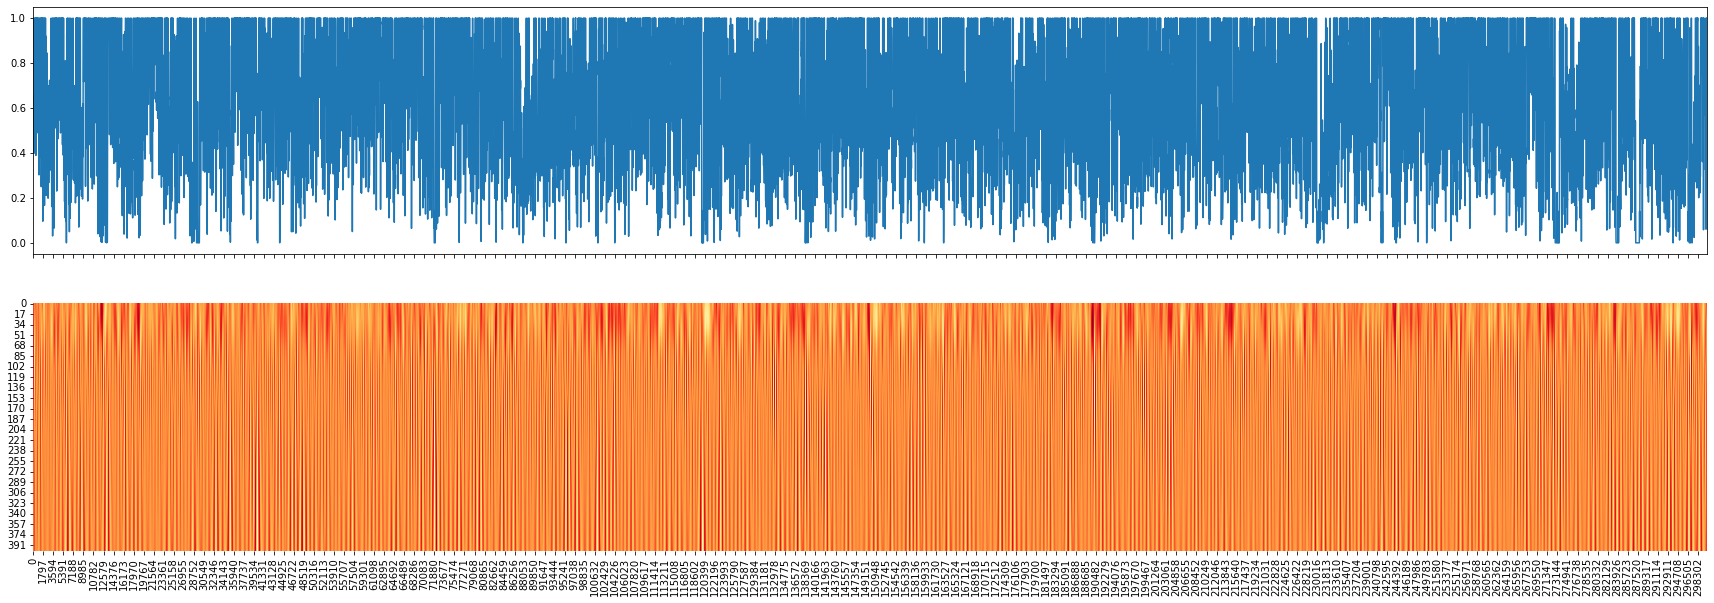

In [97]:
i = 100
metalab = lab[pos[100]-150000:pos[100]+150000]

coef, freq = pywt.cwt(metalab, np.arange(100, 500), "gaus8", method="fft")
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(30, 10))
axs[0].plot(metalab)
sns.heatmap(coef, ax = axs[1], cbar = False, cmap = "YlOrRd")

<AxesSubplot:>

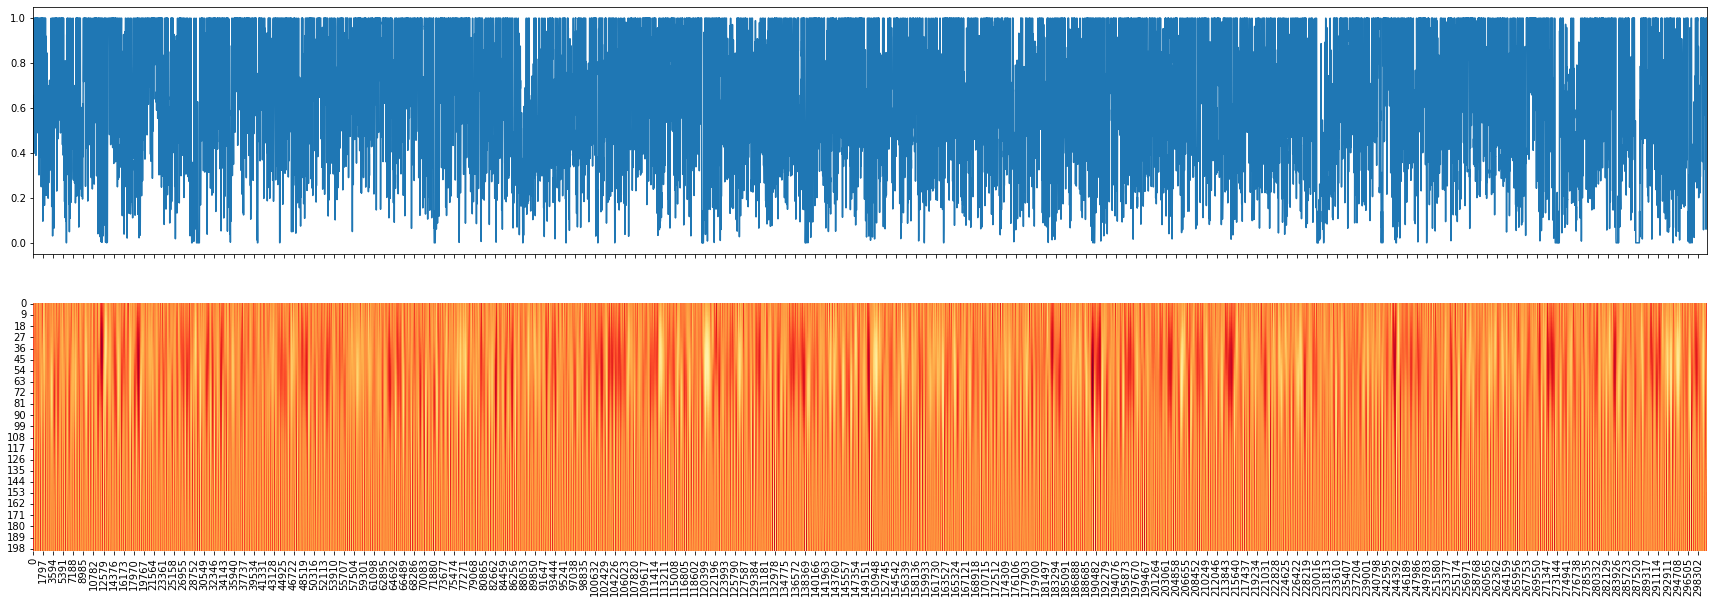

In [99]:
i = 100
metalab = lab[pos[i]-150000:pos[i]+150000]

coef, freq = pywt.cwt(metalab, np.arange(100, 300), "morl", method="fft")
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(30, 10))
axs[0].plot(metalab)
sns.heatmap(coef, ax = axs[1], cbar = False, cmap = "YlOrRd")

In [4]:
metalab = np.mean(lab[mf.create_ranges(pos-500, pos+500)].reshape((-1, 1000)), axis = 0)
import scipy


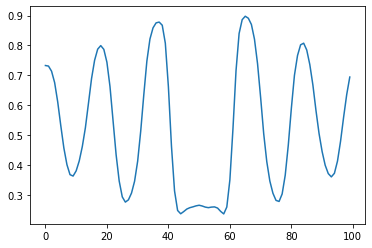

In [8]:

plt.plot(metalab[::10])

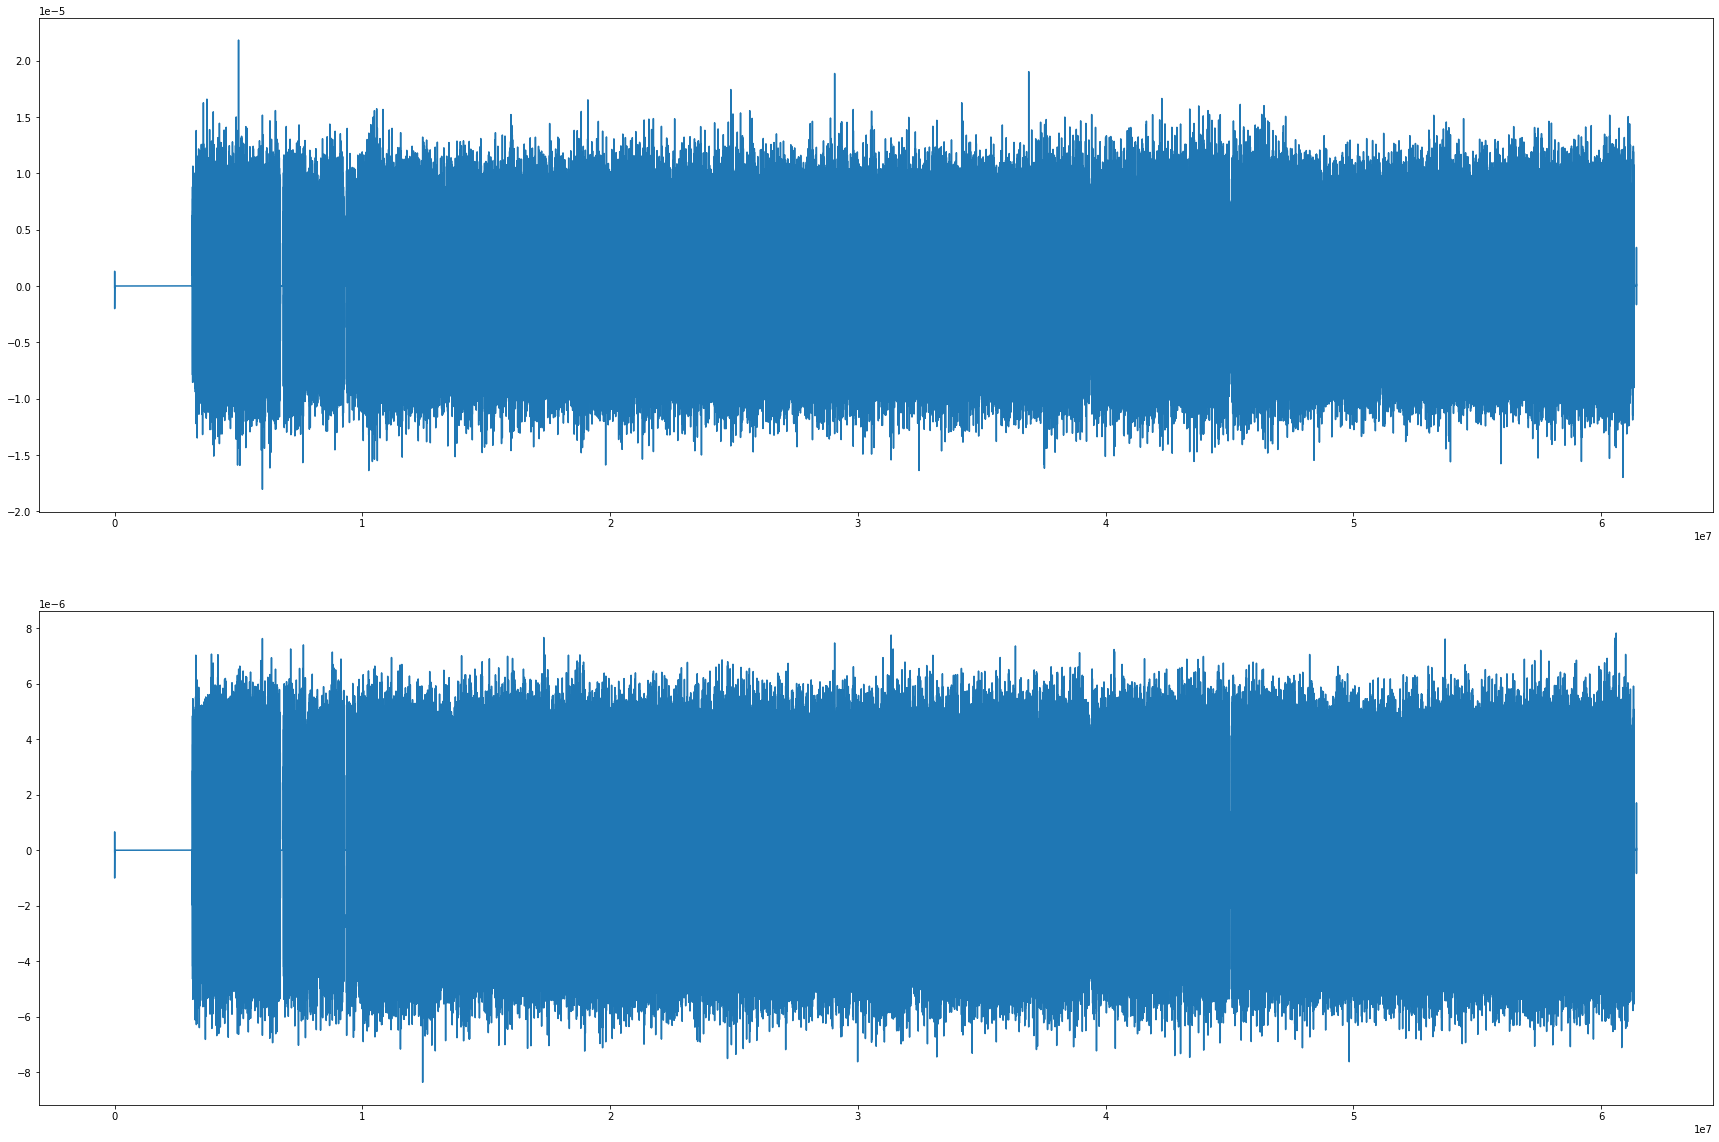

In [20]:
n = 2
metalab = lab[int(0.5e7):int(0.5e7)+1500]#np.mean(lab[mf.create_ranges(pos-1500, pos+1500)].reshape((-1, 3000)), axis = 0)
fig, axs = plt.subplots(n,1,figsize=(30, 20))
for i in range(1,n+1):
    axs[i-1].plot(scipy.signal.correlate(mf.zscore(lab)/len(lab), mf.zscore(metalab[::i]), "same"))
# for p in pos:
#     plt.axvline(p, alpha = 0.1, color="red")

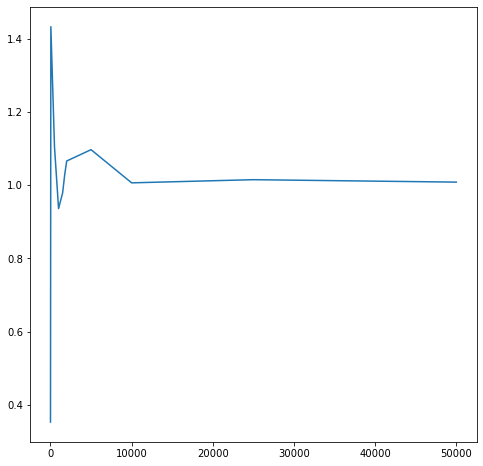

In [18]:
def my_corrcoef( x, y ):    
    mean_x = np.mean( x )
    mean_y = np.mean( y )
    std_x  = np.std ( x )
    std_y  = np.std ( y )
    n      = len    ( x )
    return np.correlate( x - mean_x, y - mean_y, mode = 'same' ) / n / ( std_x * std_y )

import scipy
mx = []
for i in (5,50,500,1000,1500,1750,2000,5000,10000,25000,50000):
    metalab = lab[int(0.5e7):int(0.5e7)+i]
    cor = scipy.signal.correlate(mf.zscore(lab[int(0.5e7)-250000:int(0.5e7)+250000])/i, mf.zscore(metalab), "same")
    mx.append(np.max(cor))

plt.figure(figsize=(8, 8))
plt.plot((5,50,500,1000,1500,1750,2000,5000,10000,25000,50000), mx)
#plt.plot((5,10000),(5,10000))




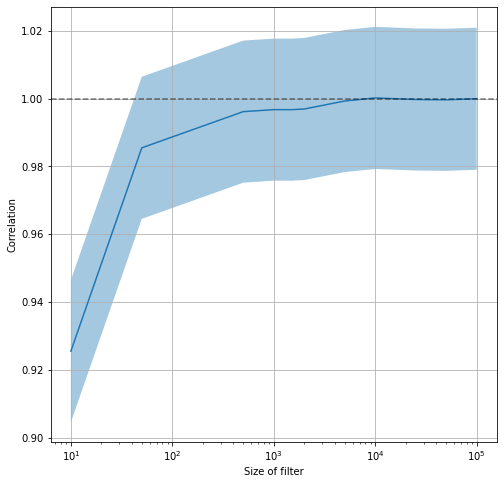

In [58]:
import scipy
import numpy
corr_list = []

filter_size = (10,50,500,1000,1500,2000,5000,10_000,25_000,50_000,100_000)

def zscore(a):
    return (a-np.mean(a))/np.std(a)

for t in range(100):
    random_sig = np.random.random(500_000)
    corr_list.append([])
    for size in filter_size:
        subset = random_sig[250_000:250_000+size]
        cor = scipy.signal.correlate(zscore(random_sig)/size, zscore(subset), "same")
        corr_list[-1].append(cor[250_000+size//2])

plt.figure(figsize=(8, 8))
mean_cor = np.mean(corr_list, axis = 0)
std_cor = np.std(mean_cor, axis = 0)
plt.plot(filter_size, mean_cor)
plt.fill_between(filter_size,
                  mean_cor-std_cor,
                  mean_cor+std_cor,
                  alpha = 0.4)
plt.axhline(1, linestyle="--", color = "k", alpha = 0.5)
plt.ylabel("Correlation")
plt.xlabel("Size of filter")
plt.xticks(filter_size)
plt.xscale("log")
plt.grid()


In [4]:
import scipy
hm = []
for f in range(150, 250, 5):
    wave = np.sin((np.arange(0, 3*f, 1)*2*np.pi*(1/f))+1.5*np.pi)
    corr = scipy.signal.correlate(mf.zscore(lab)/len(wave), 
                        mf.zscore(wave),
                        "same")
    hm.append(mf.reshape_bin(np.clip(np.abs(corr),0,1), 100, np.mean)) #pos[100]-5000000:pos[100]+5000000


KeyboardInterrupt: 

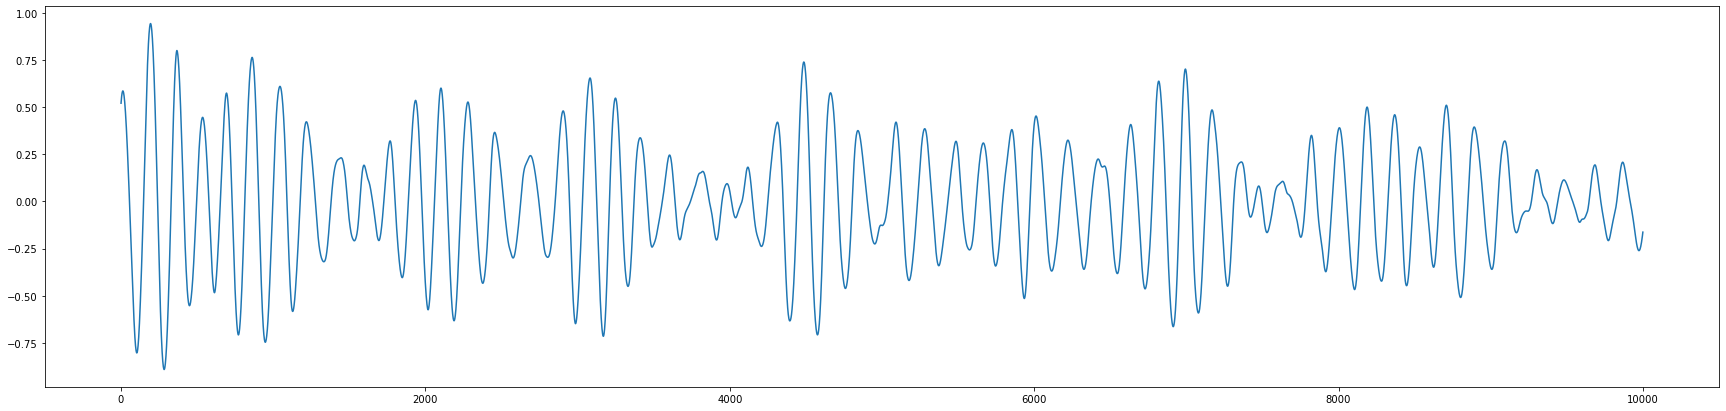

In [72]:
plt.figure(figsize=(30, 7))
f=180
wave = np.sin((np.arange(0, 3*f, 1)*2*np.pi*(1/f))+1.5*np.pi)
corr = scipy.signal.correlate(mf.zscore(lab)/len(wave), 
                        mf.zscore(wave),
                        "same")
plt.plot(corr[10000000:10010000])

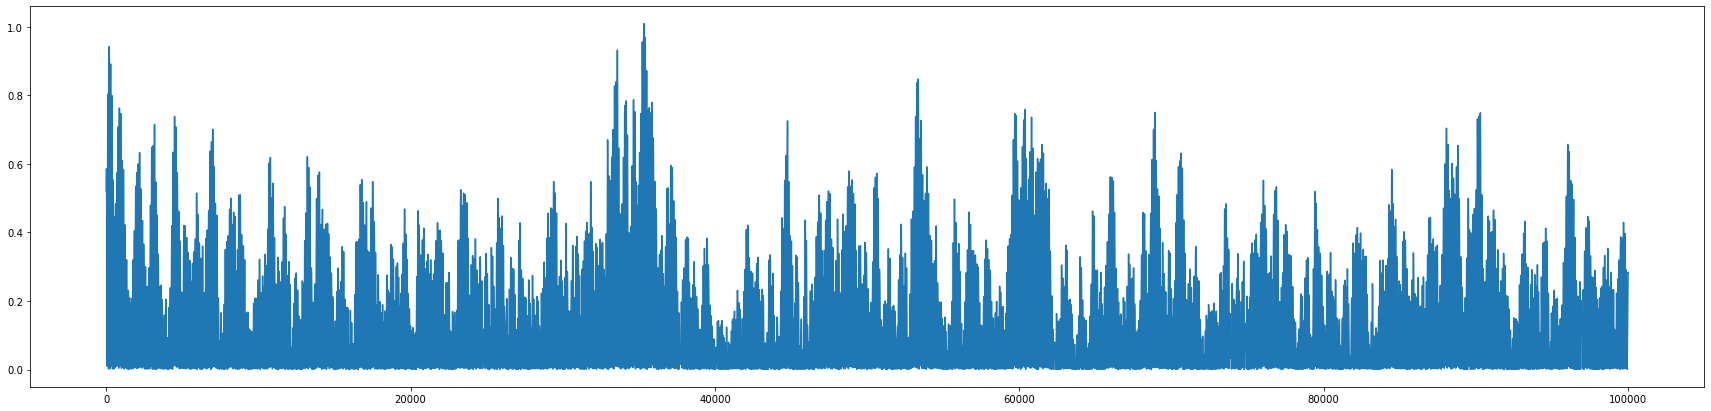

In [78]:
plt.figure(figsize=(30, 7))
plt.plot(np.abs(corr[10000000:10100000]))

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sys import path
path.insert(1, "/home/maxime/data/utils")
import myfunc as mf
import logomaker as lm
import seaborn as sns
import pywt
import scipy
# with open("/home/maxime/data/mnase/wavelets/310723/readme", "w") as f:
#     f.write("wave: np.sin((np.arange(0, 3*f, 1)*2*np.pi*(1/f))+1.5*np.pi)\n \
#             range: (150, 251)\n \
#             lab: /home/maxime/data/mnase/labels/IP_data/MNase_bed/multimappers/A/gauss15/chrX.npz")
    
for chr in range(1, 20):
    lab = mf.loadnp(f"/home/maxime/data/mnase/labels/IP_data/MNase_bed/multimappers/A/gauss15/chr{chr}.npz")
    chr_hm = []
    for f in range(150, 251):
        wave = np.sin((np.arange(0, 3*f, 1)*2*np.pi*(1/f))+1.5*np.pi)
        corr = scipy.signal.correlate(mf.zscore(lab)/len(wave), 
                            mf.zscore(wave),
                            "same")
        chr_hm.append(mf.reshape_bin(np.clip(np.abs(corr),0,1),200,np.mean)) #pos[100]-5000000:pos[100]+5000000
        #hm.append(np.unique(np.argmax(corr, axis = 0), return_counts=True))
    chr_hm = np.array(chr_hm)
    np.savez_compressed(f"/home/maxime/data/mnase/wavelets/310723/{chr}",chr_hm)

In [57]:
clutches = mf.consecutive(np.where(pd.Series(np.argmax(hm, axis = 0)).rolling(10).min().fillna(-1)>0)[0], 1)
corrmax = np.array(hm)[np.argmax(hm, axis = 0),np.arange(len(hm[0]))]
corr_clutch = [np.max(corrmax[c]) for c in clutches]

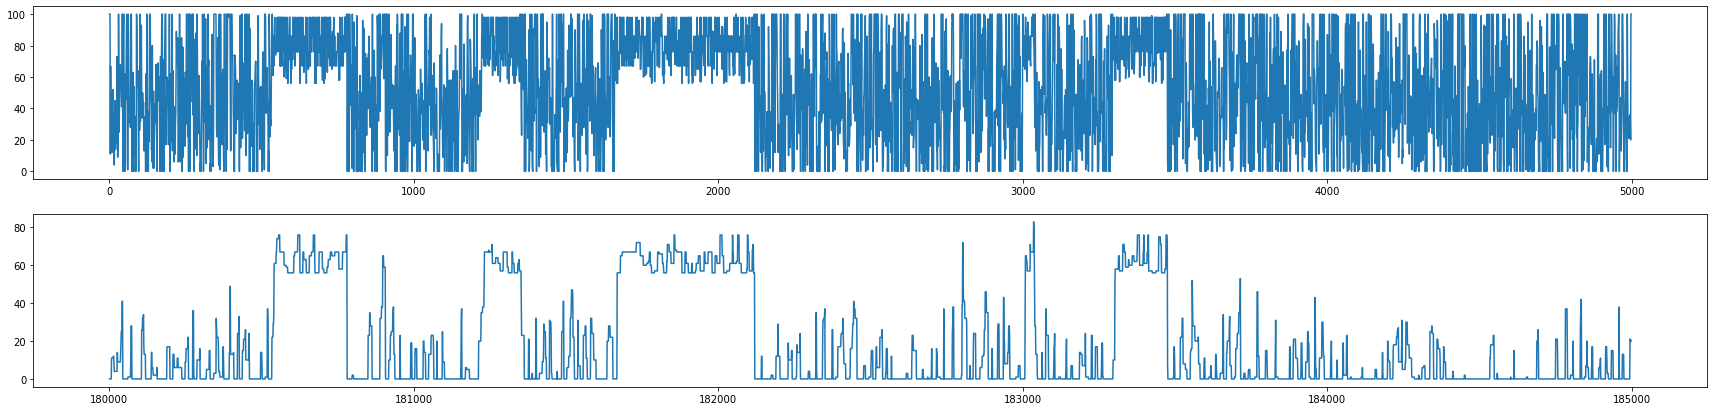

In [55]:
fig, axs = plt.subplots(2,1,figsize=(30, 7))
pos, l = 180000, 5000
axs[0].plot(np.argmax(hm, axis = 0)[pos:pos+l])
axs[1].plot(pd.Series(np.argmax(hm, axis = 0)).rolling(10).min().fillna(-1)[pos:pos+l])

ValueError: x and y must have same first dimension, but have shapes (101,) and (32,)

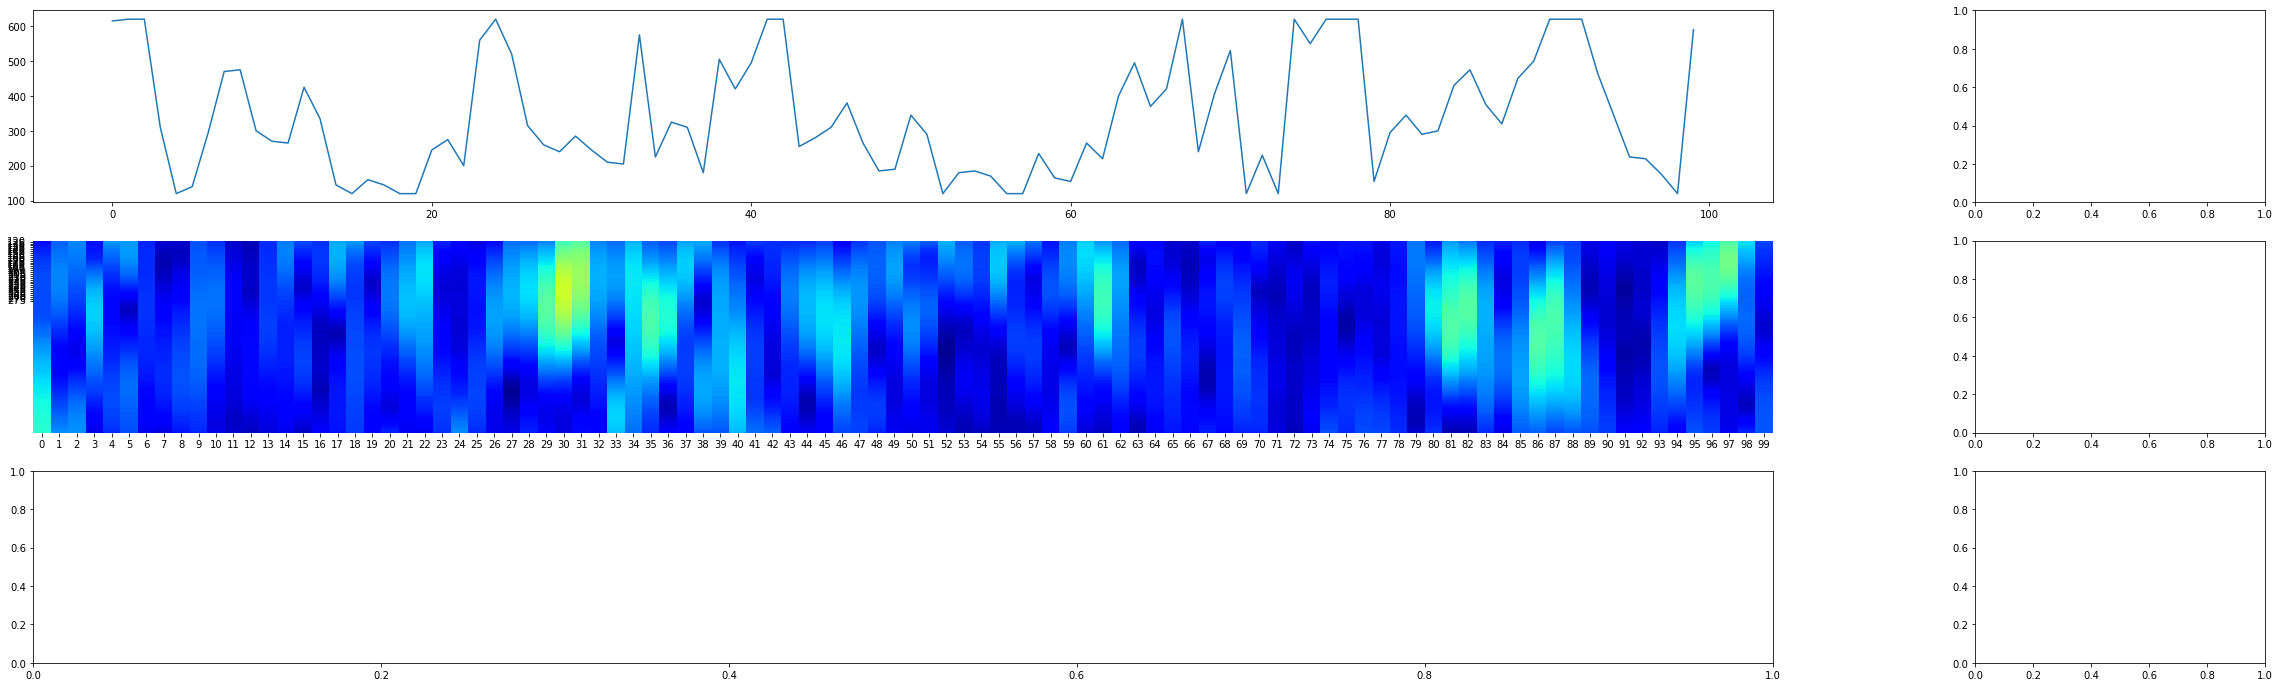

: 

In [100]:
fig, axs = plt.subplots(3, 2, figsize=(40, 12), gridspec_kw={"width_ratios":(6,1)})
pos, l = 100000, 100
hm = np.array(hm)
axs[0][0].plot(np.argmax(hm[:, pos:pos+l], axis = 0)*5+120)
sns.heatmap(hm[:, pos:pos+l], cmap="jet", vmin=0, vmax=1, yticklabels=(range(120, 280, 5)), ax=axs[1][0], cbar=False)
axs[1][1].plot( np.sum(hm[:, pos:pos+l], axis = 1), range(120, 280, 5))
axs[2][0].plot(lab[pos*200:(pos+l)*200])
fig.tight_layout()

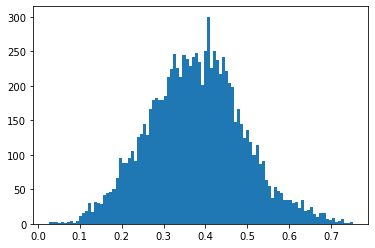

In [58]:
_ = plt.hist(corr_clutch, 100)

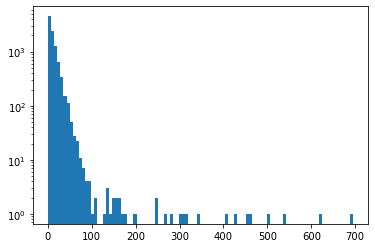

In [59]:
plt.hist([len(x) for x in clutches], 100)
plt.yscale("log")

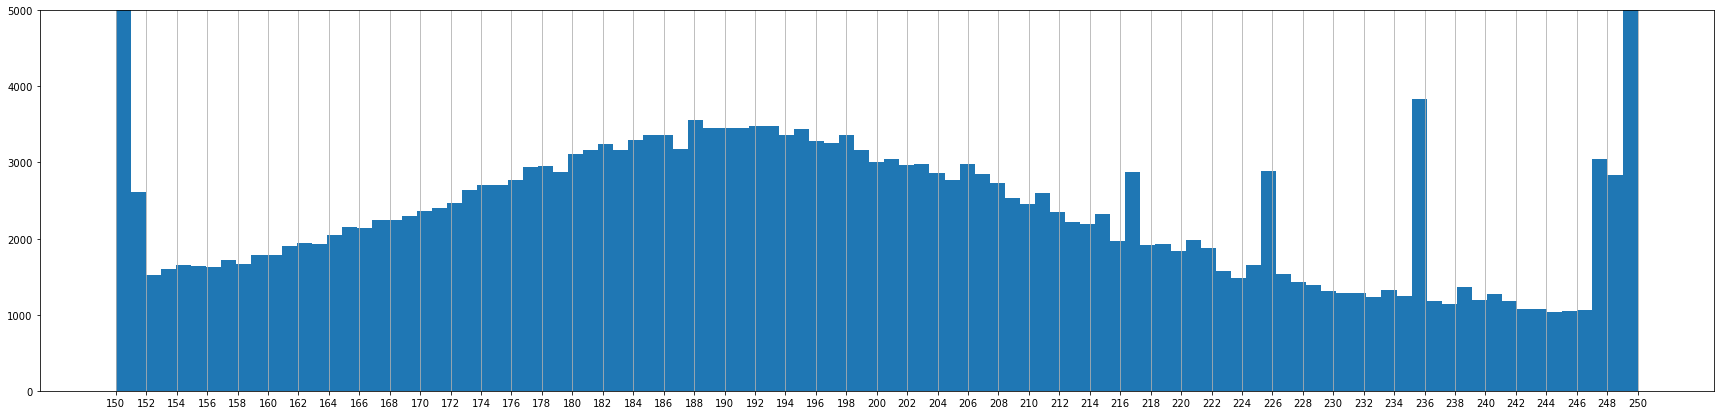

In [47]:
plt.figure(figsize=(30, 7))
_ = plt.hist(np.argmax(hm, axis = 0)+150, len(range(150, 251)))
# plt.yscale("log")
#plt.xlim(151, 249)
plt.ylim(0,5000)
_ = plt.xticks(range(150, 251, 2))
plt.grid(axis="x")

<AxesSubplot:>

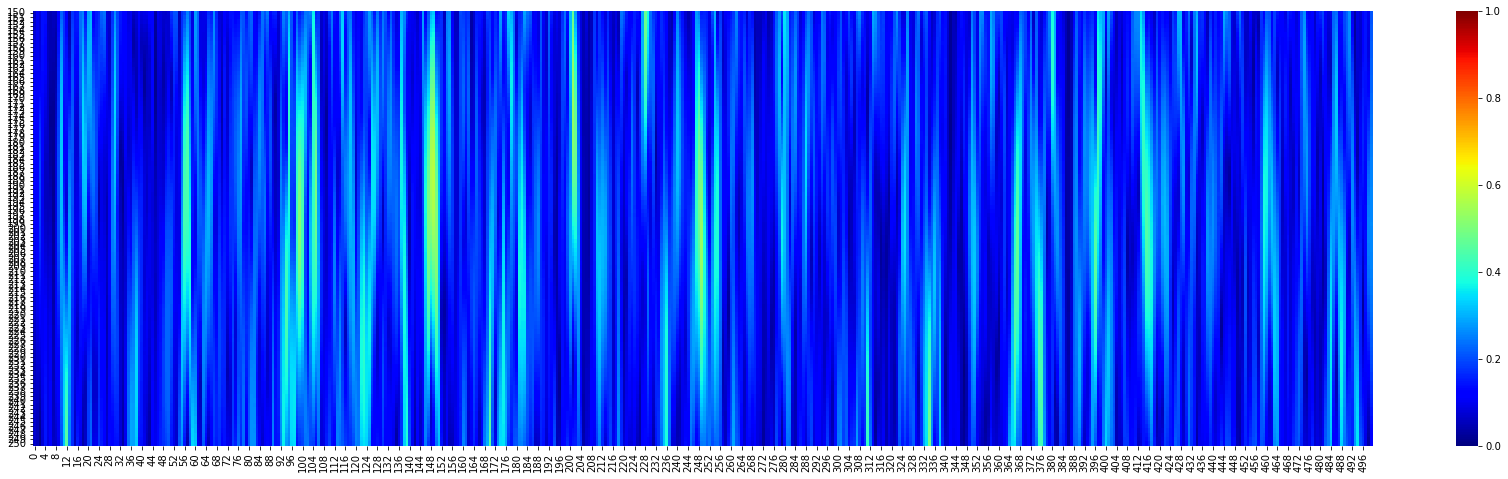

In [60]:
plt.figure(figsize=(30, 8))
sns.heatmap(np.array(hm)[:,100500:101000], cmap="jet", vmin=0, vmax=1, yticklabels=(range(150, 251)))

In [62]:
len(hm)

101

<AxesSubplot:>

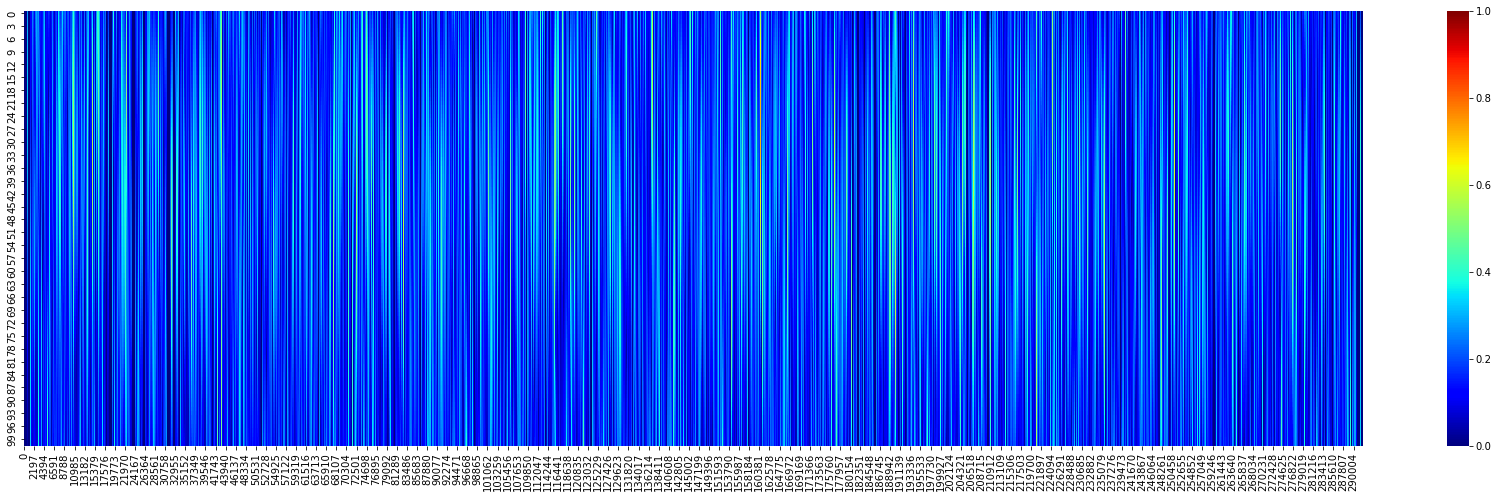

In [63]:
plt.figure(figsize=(30, 8))
sns.heatmap(hm, cmap="jet", vmin=0, vmax=1)

9127


<AxesSubplot:>

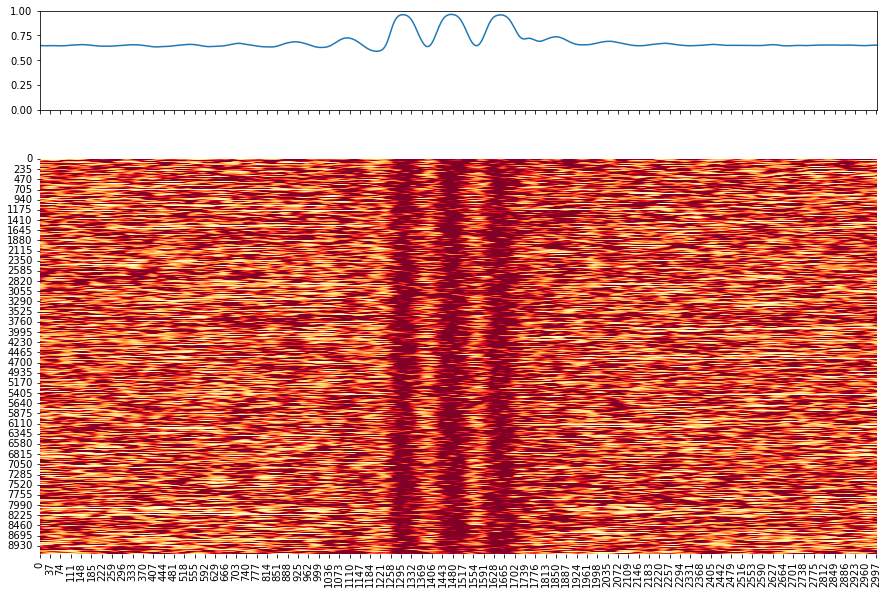

In [65]:
tmp = []
f = 170
wave = np.sin((np.arange(0, 3*f, 1)*2*np.pi*(1/f)))
#wave = np.hstack((mf.normalize(wave), np.zeros(f), mf.normalize(wave)))
sig = scipy.signal.correlate(lab, mf.normalize(wave), "same")
interpos = mf.consecutive(np.where(sig>np.quantile(sig, 0.99))[0], 100)
print(len(interpos))
for p in range(len(interpos)):
    tmp.append(lab[interpos[p][0]-1500:interpos[p][0]+1500])
tmp = np.array(tmp)
idx = np.arange(len(tmp))#np.argsort(np.sum(tmp[:,1400:1600], axis = 1))
fig, axs = plt.subplots(2, 1, figsize=(15, 10), gridspec_kw={"height_ratios":(1, 4)}, sharex=True)
axs[0].plot(np.mean(tmp[idx], axis = 0))
axs[0].set_ylim(0, 1)
sns.heatmap(tmp[idx], cbar=False, cmap="YlOrRd", vmin=0, vmax=1)

In [62]:
seq = mf.loadnp("/home/maxime/data/sequences/mm10/one_hot/chr19.npz")
for p in np.array(interpos)[idx[:100]]:
    print(f">{p[0]}")
    print("".join(mf.BASES[np.argmax(seq[p[0]-50:p[0]+50], axis=1)]))

>61151086
TATAATGTGAAGTAAAATTAAGAAATTCTTTACTATTTGATGGCGTTTAATGATTTAGTTTCTCAATAACTTAGGCTTGCCTACTAGCTATTTACTGACA
>46522960
GAGATGGCTCAGTGGGTAAGAGCACCCGACTGCTCTTCTGAAGGTCAGGAGTTCAAATCCCAGCAACCACATGGTGGCTCACAACCATCCGTAAGGAGAT
>38925040
CCTCCCTCCCCTCCCTCCCTCCCTCCCTCCCTCCCTCCCTCCCTCCCTCCCTCCCTCCCTCCCTCCCTCTCCCCCCCCCCCTCTCTCTCTCCAGGGTCTC
>5726305
TCAAGAGTAGCGAGCGCGCCGTTTCCTGGAGCCGCACCCCCCCCCCTCGCCCCGCGTCCGAAGGCGGGCGGGGCTGCAGCGCGGGGCGGGGCGACCCTGC
>44388669
ATTGGCTGCGCGGGGTCAGGCGCTGTGGGCCGAGTGAACGCGAGTGACCCCGAGGGCGGGTGCTGACCGAGAATAACCCCGGGAGGGCGTGCCTCTCTGG
>6685832
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGCACACACACATAC
>47327276
TCCAGAAGACCACATGGAGACTTGGGGGTATGGGGGAGACAGGGAGAAGGAGAGGGGGAGGGGGAGGGGGAGGGGGAGGGGGAGGGGGAAGGAGAGGGAG
>29813037
AGGGAGTCTGCGGCTGGGAGCGGTGACGTCAGTGAGGCGACGCCGGGGATGGGCGGGGCGCTGCTCCCACTCTCCGCTGCGGCGGGGTGAAGCTGGCAGG
>46444449
CCATCTGTTTCGTAAATCAGGAGCAACGGTGCCACCTACTGGACTCTTCCTATTACTACAGGCTCAGTGACTGCCCCGTTTTCTGGCAAGTACACATTGA
>58

/tmp/ipykernel_188349/3355094781.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  for p in np.array(interpos)[idx[:100]]:


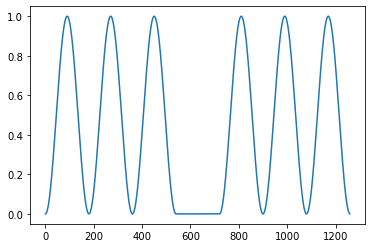

In [52]:
f = 180
wave = np.sin((np.arange(0, 3*f, 1)*2*np.pi*(1/f)+3*np.pi/2))
plt.plot(np.hstack((mf.normalize(wave), np.zeros(f), mf.normalize(wave))))